# Generating a Random Variable [25 pts]

![Image Description](question1.png)


![Image Description](q1_1.png)
![Image Description](q1_1_written.png)

![Image Description](q1_2.png)

In [1]:
import numpy as np

num_samples = 10000

def generate_RV_Z():
    u = np.random.rand()
    z = np.sqrt( - np.log(1 - u) )
    return z

array_of_Z_RV = np.zeros(num_samples)

for i in range(num_samples):
    array_of_Z_RV[i] = generate_RV_Z()


![Image Description](q1_2a.png)

![Image Description](q1_2a_written.png)

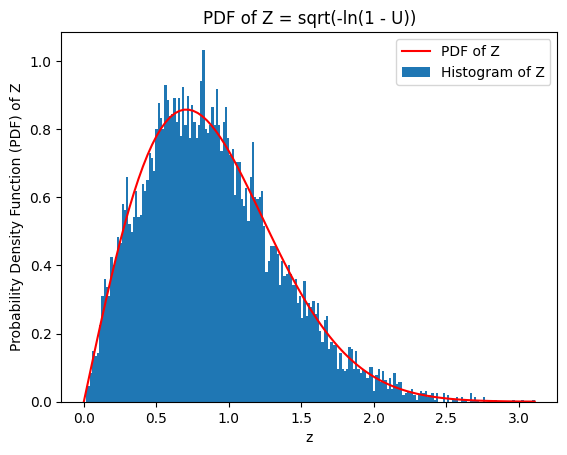

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(0, np.max(array_of_Z_RV), 100)

#note: in my work above I meant f(z) = 2z * exp(-z^2), not f(x)
pdf_z = 2 * z * np.exp(- (z**2))

plt.plot(z, pdf_z, color='red', label='PDF of Z')
plt.hist(array_of_Z_RV, bins=(num_samples//50), density=True, label='Histogram of Z')

plt.xlabel('z')
plt.ylabel('Probability Density Function (PDF) of Z')
plt.title('PDF of Z = sqrt(-ln(1 - U))')

plt.legend()
plt.show()


![Image Description](q1_2b.png)
![Image Description](q1_2b_written.png)

![Image Description](q1_2c.png)
![Image Description](q1_2c_written.png)

![Image Description](q1_2d.png)

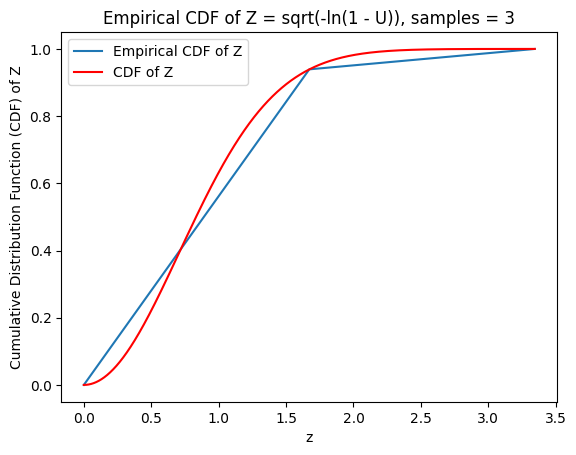

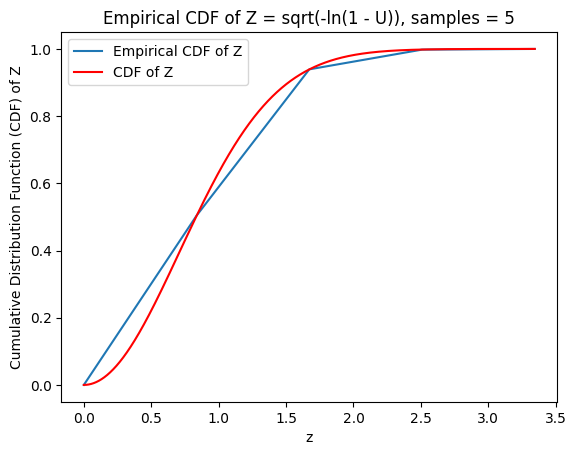

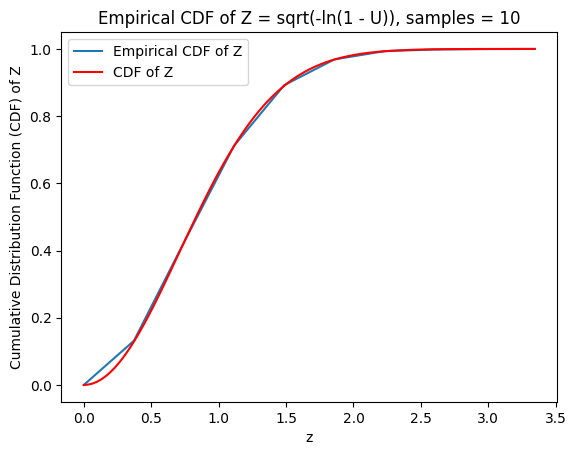

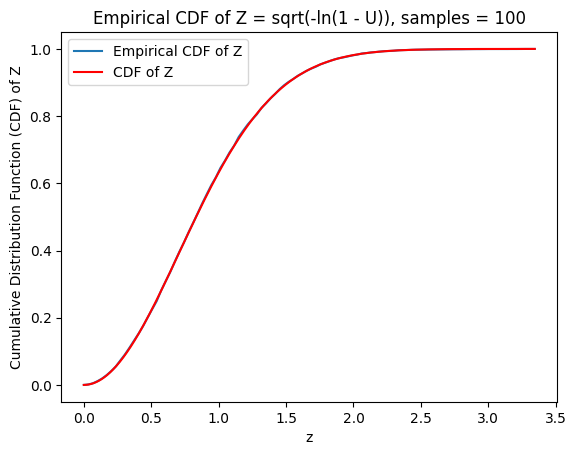

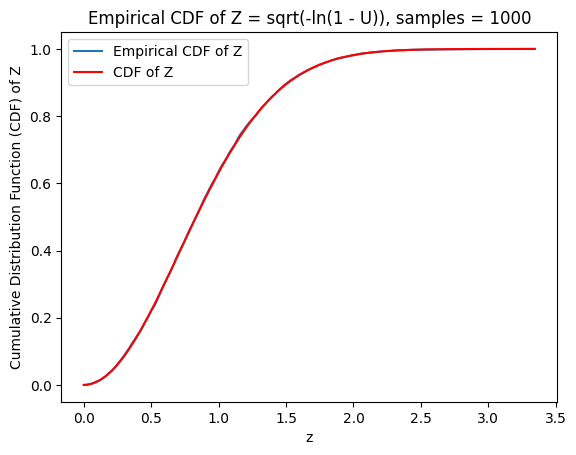

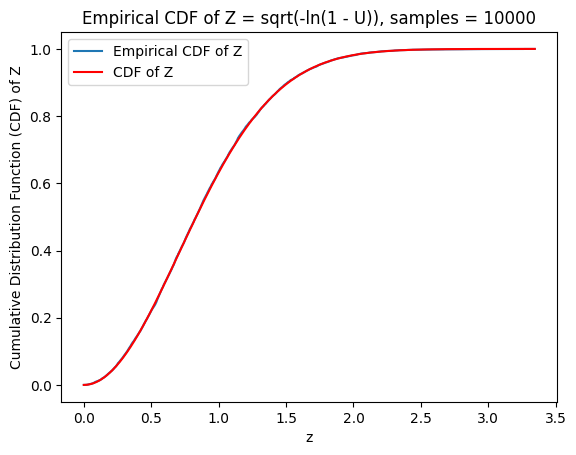

In [3]:

# regenerating samples
num_samples = 10000

array_of_Z_RV = np.zeros(num_samples)

for i in range(num_samples):
    array_of_Z_RV[i] = generate_RV_Z()


# creating a linear space between 0 and the maximum value of the random variable Z
max_Z = np.max(array_of_Z_RV)
min_Z = 0
num_samples_array = [3, 5, 10, 100, 1000, 10000]

for i in range(len(num_samples_array)):
        
    num_less_than_samples = num_samples_array[i]
    num_less_than = np.zeros(num_less_than_samples)
    linspace_x = np.linspace(min_Z, max_Z, num_less_than_samples)

    # checking how many samples less than each value in the linear space, storing in new array
    for j in range(num_less_than_samples):
        num_less_than[j] = np.sum(array_of_Z_RV < linspace_x[j])

# ------------- PLOTS -------------

    # plotting the empirical CDF
    plt.plot(linspace_x, num_less_than/num_samples, label='Empirical CDF of Z')

    # print(num_less_than/num_samples)

    # plotting the theoretical CDF
    cdf_linspace = np.linspace(0, max_Z, num_samples)
    cdf_z = 1 - np.exp(- cdf_linspace**2)

    plt.plot(cdf_linspace, cdf_z, color='red', label='CDF of Z')

    plt.xlabel('z')
    plt.ylabel('Cumulative Distribution Function (CDF) of Z')
    plt.title('Empirical CDF of Z = sqrt(-ln(1 - U)), samples = ' + str(num_samples_array[i]))
    plt.legend()
    plt.show()



# Monte Carlo Integration [25 pts]

![Image Description](question2.png)

![Image Description](q2_1a.png)

In [55]:
## monte carlo integration
import numpy as np
import matplotlib.pyplot as plt

def func_to_integrate(x):
    return (np.sin(2 * np.pi * x))**2

def random_point_x(lower_X = 0, upper_X = 3):
    return np.random.uniform(lower_X, upper_X)

def get_estimated_integral(num_samples = 1000, show_graph = False):
    # num_samples = 1000
    # num_below_curve = 0

    Y_k_array = np.zeros(num_samples)

    for i in range(0,num_samples):
        U_k = random_point_x()
        Y_k = func_to_integrate(U_k)
        Y_k_array[i] = Y_k
    
    # this is the average value of Y_k over the interval [0, 3]
    avg_Y_k = np.mean(Y_k_array)

    # the estimated integral is the avg value of Y_k times the length of the interval
    estimated_integral = 3 * avg_Y_k

    return estimated_integral

    # for i in range(0,num_samples):
    #     x = random_point_x()
    #     y = random_point_y()
        
    #     if y <= func_to_integrate(x):
    #         if show_graph:
    #             plt.scatter(x, y, color='lightblue', s=5)
    #         num_below_curve += 1
    #     else:
    #         if show_graph:
    #             plt.scatter(x, y, color='black', s=5)

    # ratio_of_area_under_curve = num_below_curve / num_samples

    # boxArea = (upper_Y - lower_Y) * (upper_X - lower_X)

    # estimated_area = boxArea * ratio_of_area_under_curve

    # if show_graph:
    #     plt.show()

    # return estimated_area

# print("One run with 2000 samples of Monte Carlo Integration, with a plot showing what the algorithm is doing")
# print("The estimate of the integral is: " + str(get_estimated_integral(num_samples=3000)))

iterations = 1000

running_total_area = 0

for i in range(1, iterations):
    running_total_area = running_total_area + get_estimated_integral()

converging_integral = running_total_area / iterations

print("After 100 iterations of the montecarlo algorithm, the avg integral has value: " + str(converging_integral))

print("One run with 1000 samples has a value of: " + str(get_estimated_integral(num_samples=1000)))


After 100 iterations of the montecarlo algorithm, the avg integral has value: 1.4996398411499046
One run with 1000 samples has a value of: 1.4892674676545847


![Image Description](q2_1b.png)

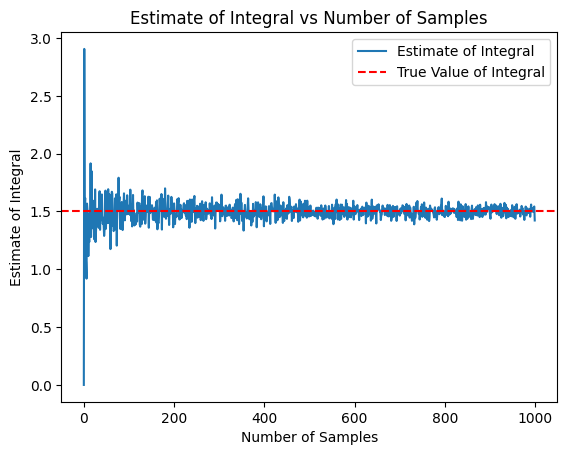

In [56]:
max_n = 1000

array_of_estimates = np.zeros(max_n)

for n in range(1, max_n):
    array_of_estimates[n] = get_estimated_integral(num_samples=n)

plt.plot(array_of_estimates, label='Estimate of Integral')

plt.axhline(y=1.5, color='red', linestyle='--', label='True Value of Integral')

plt.xlabel('Number of Samples')
plt.ylabel('Estimate of Integral')
plt.title('Estimate of Integral vs Number of Samples')
plt.legend()
plt.show()


![Image Description](q2_2.png)

Since
$$
Var(Y_n) = E(Y_n^2) - E(Y_n)^2
$$
$$
E(Y_n) \le 1
$$
$$
E(Y_n^2) \le 1
$$

Then, Var(Y_n) can maximally be (1-0) = 1. Therefore Var(Y_n) is bounded by 1.
$$
Var(Y_n) = E(Y_n^2) - E(Y_n)^2 \le 1
$$

![Image Description](q2_3.png)
![Image Description](q2_3_written_3.png)

In [57]:
from scipy.stats import norm
## inverse CDF of 1.95/2

# Calculate the inverse CDF
inverse_cdf = norm.ppf(1.95/2)

# This is used in my calculation above
print(inverse_cdf)


1.959963984540054


![Image Description](q2_4.png)

In [67]:
import numpy as np

n = 3437

simulations = 10000

deviations = []

I = 1.5  

# Run simulations
for _ in range(simulations):
    I_hat = get_estimated_integral(num_samples=n)
    deviations.append(abs(I_hat - I) > 0.1)

# Calculate the empirical probability
empirical_probability = np.mean(deviations)
print(f"The empirical probability P(|I - I_hat| > 0.1) is approximately {empirical_probability}")


The empirical probability P(|I - I_hat| > 0.1) is approximately 0.0


This makes sense as the empirical probability with the large enough n would mean that the threshold of 0.1 is basically never crossed (due to very conservative threshold).

# What is the Density [15 pts]
![Image Description](question3.png)

![Image Description](q3_1.png)
![Image Description](q3_1_written.png)

![Image Description](q3_2a.png)

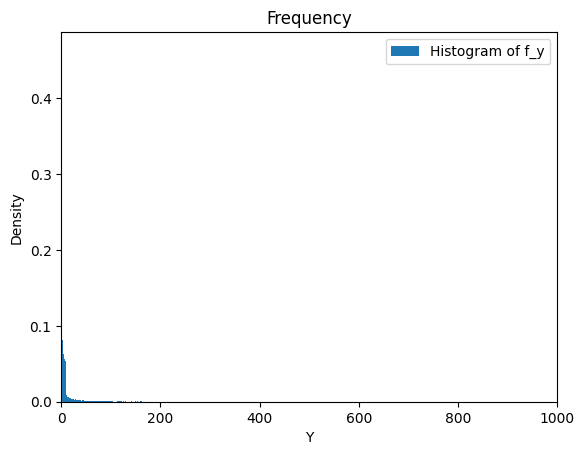

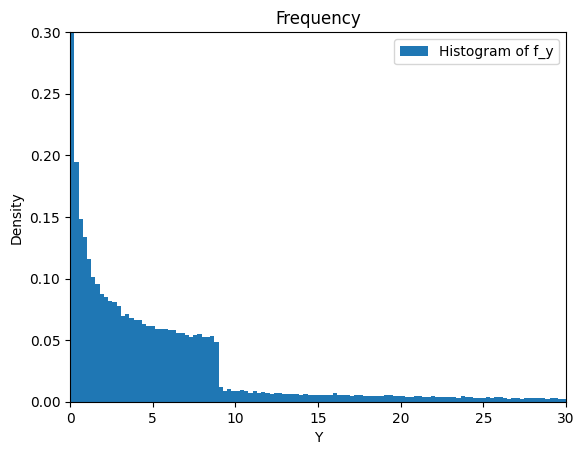

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sample_Xn():
    return -4 * np.log(1 - np.random.uniform())

def sample_Yn():
    return ((sample_Xn() - 3) ** 2)

num_samples = 100000

array_of_Yn_samples = np.zeros(num_samples)

for i in range(num_samples):
    array_of_Yn_samples[i] = sample_Yn()


plt.hist(array_of_Yn_samples, bins=(num_samples//10), density=True, label='Histogram of f_y')

plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Frequency')

plt.xlim(0,1000)

plt.legend()
plt.show()

plt.hist(array_of_Yn_samples, bins=(num_samples//10), density=True, label='Histogram of f_y')

plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Frequency')

plt.xlim(0, 30)  # Set the x-axis limits
plt.ylim(0, 0.3)  # Set the y-axis limits

plt.legend()
plt.show()

![Image Description](q3_2b.png)
![Image Description](q3_2b_written.png)

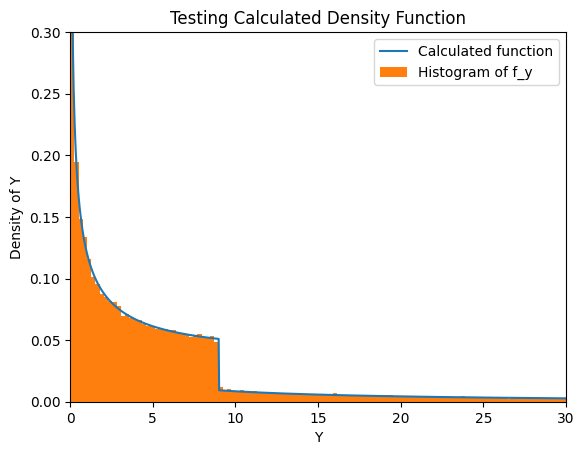

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function
def piecewise_function(x):

    def f1(x):
        return (1/(8 * np.sqrt(x))) * (np.exp( (-(3 + np.sqrt(x)))/4 ) + np.exp( (-(3 - np.sqrt(x)))/4 ))
    def f2(x):
        return (1/(8 * np.sqrt(x))) * (np.exp( (-(3 + np.sqrt(x)))/4 ))
    
    return np.piecewise(x, [x < 9, x >= 9], [f1, f2])

# Generate x values
x = np.linspace(0.1, 30, 1000)

# Evaluate the piecewise function for each x value
y = piecewise_function(x)

# Plot the piecewise function
plt.plot(x, y, label = "Calculated function")


plt.hist(array_of_Yn_samples, bins=(num_samples//10), density=True, label='Histogram of f_y')

plt.xlabel('Y')
plt.ylabel('Density of Y')
plt.title('Testing Calculated Density Function')

plt.xlim(0, 30)  # Set the x-axis limits
plt.ylim(0, 0.3)  # Set the y-axis limits

plt.legend()

# Show the plot
plt.show()


### Extra Credit
![Image Description](q3_3_EC.png)
![Image Description](q3_3_EC_written_3.png)

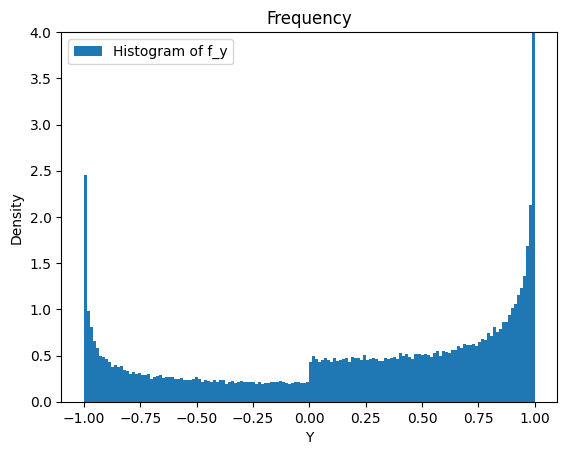

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def sample_Xn():
    return -4 * np.log(1 - np.random.uniform())

def sample_Yn():
    return np.sin(sample_Xn())

num_samples = 100000

array_of_Yn_samples = np.zeros(num_samples)

for i in range(num_samples):
    array_of_Yn_samples[i] = sample_Yn()


plt.hist(array_of_Yn_samples, bins=150, density=True, label='Histogram of f_y')

plt.xlabel('Y')
plt.ylabel('Density')
plt.title('Frequency')

plt.ylim(0,4)

plt.legend()
plt.show()

# plt.hist(array_of_Yn_samples, bins=(num_samples//10), density=True, label='Histogram of f_y')

# plt.xlabel('Y')
# plt.ylabel('Density')
# plt.title('Frequency')

# plt.xlim(0, 30)  # Set the x-axis limits
# plt.ylim(0, 0.3)  # Set the y-axis limits

# plt.legend()
# plt.show()

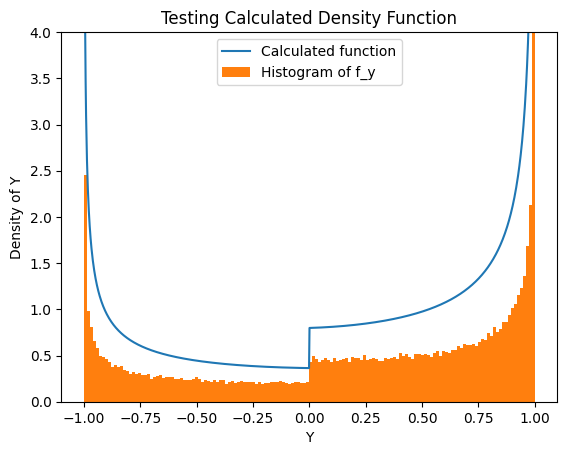

In [96]:

import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function
def piecewise_function(x):

    def f1(x):
        a = np.abs( np.cos( np.arcsin(x) ) )
        b = np.abs( np.cos( np.pi - np.arcsin(x) ) )    

        return ( ( (1/a) * (1/4) * np.exp( - (np.arcsin(x)/4)) ) + ( (1/b) * (1/4) * np.exp(- ( (np.pi-np.arcsin(x))/4 ))) )
    
    def f2(x):
        a = np.abs( np.cos( np.arcsin(x) ) )
        b = np.abs( np.cos( -np.pi - np.arcsin(x) ) )    

        return ( ( (1/a) * (1/4) * np.exp( - (np.arcsin(x)/4)) ) + ( (1/b) * (1/4) * np.exp(- ( (-np.pi-np.arcsin(x))/4 ))) )
    
    return np.piecewise(x, [x < 0, x >= 0], [f1, f2])


# Generate x values
x = np.linspace(-1, 1, 1000)

# Evaluate the piecewise function for each x value
y = piecewise_function(x)

# print(y)
# Plot the piecewise function
plt.plot(x, y, label = "Calculated function")


plt.hist(array_of_Yn_samples, bins=150, density=True, label='Histogram of f_y')

plt.xlabel('Y')
plt.ylabel('Density of Y')
plt.title('Testing Calculated Density Function')

# plt.xlim(0, 30)  # Set the x-axis limits
plt.ylim(0, 4)  # Set the y-axis limits

plt.legend()

# Show the plot
plt.show()

# Exploring Limit Theorems for Maximums [25 pts]

![Image Description](question4.png)